In [7]:
# for basic operations
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# reading the data
data = pd.read_csv('data/HousePrices.csv')

Matplotlib is building the font cache; this may take a moment.


In [14]:
data.shape

(1460, 81)

In [15]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


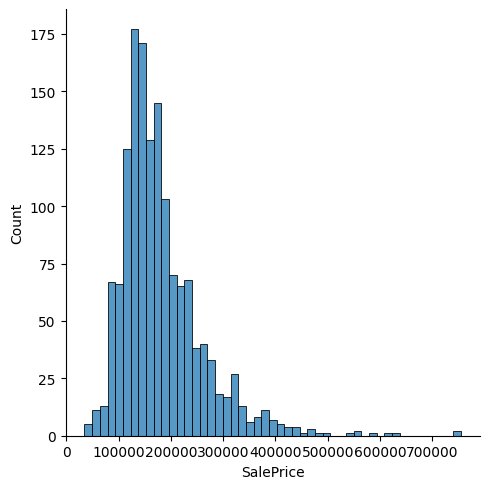

In [38]:
sns.displot(data['SalePrice'])
plt.show()

In [44]:
print(data['SalePrice'].describe(),"\n")
print("Variance ",data['SalePrice'].var())
print("Kurtosis ", data['SalePrice'].kurt())
print("Skew ", data['SalePrice'].skew())
print("Median ",data['SalePrice'].median())
print("Mode ", data['SalePrice'].mode())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Variance  6311111264.297448
Kurtosis  6.536281860064529
Skew  1.8828757597682129
Median  163000.0
Mode  0    140000
Name: SalePrice, dtype: int64


Variance measures the dispersion of the data points around the mean.
A high variance value indicates that the data points are spread out over a wide range of values.
In this case, the large variance suggests significant variability in the dataset.

Skewness measures the asymmetry of the data distribution.
A positive skewness value indicates that the right tail (higher values) is longer or fatter than the left tail.
With a skewness of 1.8, the distribution is moderately to highly positively skewed.
This suggests that most data points are concentrated on the lower end, with a few extreme values on the higher end.

Kurtosis indicates the "tailedness" of the distribution.
A kurtosis value significantly greater than 3 (which is the kurtosis of a normal distribution) suggests a leptokurtic distribution.
This means the data has heavier tails and a sharper peak compared to a normal distribution.
There is a higher likelihood of extreme values or outliers in the dataset.

In [47]:
np.random.seed(23)
sampleprice = np.random.choice(a=data['SalePrice'],size=500)
sampleprice.mean()

np.float64(181655.048)

np.random.seed(23): This line sets the seed for the NumPy random number generator. This ensures that whenever you run this code with the same seed (23 in this case), you'll get the same sequence of random numbers. This is useful for debugging or reproducibility purposes.

sampleprice = np.random.choice(a=data['SalePrice'],size=500): This line generates a random sample of prices from the SalePrice column within a dataset (data). Here's what each part does:

np.random.choice: This is a NumPy function used for random sampling.
a=data['SalePrice']: This specifies the source of the random sample. Here, it's set to the SalePrice column within the data variable.
size=500: This defines the desired sample size, which is 500 in this case. So, it will randomly pick 500 prices from the SalePrice column.
sampleprice.mean(): This line calculates the average (mean) of the randomly chosen prices stored in the sampleprice variable. It essentially tells you the average price out of the 500 randomly selected prices.

In [48]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


A z-test is used in statistics to determine whether there is a significant difference between sample data and a population or between two sample means. It is based on the assumption that the sampling distribution of the test statistic follows a normal distribution

Conditions for Using a Z-Test:
1. Large Sample Size (Central Limit Theorem)
2. Known Population Variance
3. Random Sampling
4. Independence

Types of Z-Tests:
1. One-Sample Z-Test
2. Two-Sample Z-Test
3. Z-Test for Proportions

In [49]:
from statsmodels.stats.weightstats import ztest
zval , pval = ztest(x1 = data[data['Neighborhood']=='Edwards']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-12.196987594087203    :  3.2253680352007412e-34


In [50]:
zval , pval = ztest(x1 = data[data['Neighborhood']=='OldTown']['SalePrice'], value=data['SalePrice'].mean())
print(zval ,'   : ', pval)

-10.639294263334575    :  1.9560526026260018e-26


Z-value: The extremely large (in magnitude) Z-value indicates that the difference between the sample mean and the population mean is very large in terms of standard deviations. This suggests a significant deviation from what is expected under the null hypothesis.

P-value: The very small p-value (essentially 0) indicates that the likelihood of observing such a difference due to random chance is extremely low. Typically, a p-value below 0.05 is considered statistically significant. Here, the p-value is orders of magnitude smaller, which strongly suggests that the null hypothesis should be rejected.


This code snippet calculates the z-score for a specific sale price in the 'SawyerW' neighborhood of a dataset, and then uses the cumulative distribution function (CDF) to determine the probability of observing a value less than or equal to this sale price under a normal distribution.This calculates the z-score (z_sc) for a house with a sale price of 280000. The z-score measures how many standard deviations an element is from the mean.

In [25]:
mean_ =data[data['Neighborhood']=='Edwards']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='Edwards']['SalePrice'].std()
from scipy import stats
z_sc=(180000-mean_)/stdev
stats.norm.cdf(z_sc)


np.float64(0.8846152543518948)

There is 88% chance to get a house in Edwards neighborhood for 180000. The below indicates for 90% probablility the Sales Price for Edwards is ~200K

The expression stats.t.interval(.90, len(data[data['Neighborhood']=='Edwards']['SalePrice']), mean_, scale=stdev) computes a confidence interval for the mean sale price in the 'Edwards' neighborhood using  t-distribution. 

In [26]:
stats.t.interval(.90,len(data[data['Neighborhood']=='Edwards']['SalePrice']),mean_, scale=stdev)

(np.float64(56483.271773501154), np.float64(199956.1282264988))

In [27]:
mean_ =data[data['Neighborhood']=='SawyerW']['SalePrice'].mean()
stdev =data[data['Neighborhood']=='SawyerW']['SalePrice'].std()
from scipy import stats
z_sc=(280000-mean_)/stdev
stats.norm.cdf(z_sc)

np.float64(0.9534318553545458)

The expression stats.t.interval(.90, len(data[data['Neighborhood']=='SawyerW']['SalePrice']), mean_, scale=stdev) computes a confidence interval for the mean sale price in the 'SawyerW' neighborhood using  t-distribution. 

stats.t.interval: This function from scipy.stats calculates the confidence interval for a given dataset assuming a t-distribution.

.90: This parameter specifies the confidence level. In this case, .90 corresponds to a 90% confidence level, meaning we are constructing a confidence interval where there is a 90% probability that the true population mean falls within this interval.

len(data[data['Neighborhood']=='SawyerW']['SalePrice']): This represents the number of observations (sample size) in the 'SawyerW' neighborhood dataset. It determines the degrees of freedom used in the t-distribution.

mean_: This is the sample mean of the 'SalePrice' data in the 'SawyerW' neighborhood. It serves as the point estimate for the population mean.

scale=stdev: This parameter specifies the scale of the distribution, which is the standard deviation (stdev) of the 'SalePrice' data in the 'SawyerW' neighborhood. The scale parameter determines the spread or dispersion of the t-distribution.

In [28]:
stats.t.interval(.90,len(data[data['Neighborhood']=='SawyerW']['SalePrice']),mean_, scale=stdev)

(np.float64(93556.13083132515), np.float64(279555.4623890138))


Interpretation
The stats.t.interval function computes a confidence interval based on the t-distribution, which is typically used when the sample size is small or when the population standard deviation is unknown. Here’s how to interpret the resulting confidence interval:

The output of stats.t.interval will be a tuple (lower_bound, upper_bound) that represents the lower and upper bounds of the confidence interval.

For example, if the result is (a, b), then we can say with 90% confidence that the true population mean of house sale prices in the 'SawyerW' neighborhood lies between a and b.

A wider interval indicates greater uncertainty (lower precision) in estimating the true population mean, while a narrower interval indicates higher precision.

This interval helps quantify the range within which we expect the true mean sale price to fall, given the observed data from the 'SawyerW' neighborhood and assuming a 90% confidence level.

In [29]:
data[data['Neighborhood']=='SawyerW']['SalePrice'].max()

np.int64(320000)

In [30]:
a=data[data['Neighborhood']=='SawyerW']['SalePrice']
b=data[data['Neighborhood']=='Edwards']['SalePrice']
stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=np.float64(7.375410592264813), pvalue=np.float64(8.880142338427138e-12), df=np.float64(157.0))


The code snippet you provided performs a one-sample t-test using a sample of sale prices from the 'CollgCr' neighborhood against the population mean sale price (popmean) of the entire dataset (data['SalePrice'].mean()). Here’s a breakdown of what each part does:

stats.ttest_1samp: This function from scipy.stats performs a t-test on a single sample of data (data[data['Neighborhood']=='CollgCr']['SalePrice'].sample(50)) against a given population mean (popmean).

data[data['Neighborhood']=='CollgCr']['SalePrice'].sample(50): This selects a random sample of 50 sale prices from the 'CollgCr' neighborhood in your dataset (data). The t-test will assess whether this sample mean is significantly different from the population mean.

popmean=data['SalePrice'].mean(): This specifies the population mean against which the sample mean is tested. It is the mean sale price of all neighborhoods in your dataset (data).

tscore: This variable stores the calculated t-statistic, which measures the difference between the sample mean and the population mean in terms of standard error units.

pvalue: This variable stores the p-value associated with the t-test. The p-value indicates the probability of obtaining a result as extreme as the one observed, assuming the null hypothesis (that the sample mean is equal to popmean) is true.

In [51]:
# 1 sample t test.
tscore, pvalue = stats.ttest_1samp(data[data['Neighborhood']=='CollgCr']['SalePrice'].sample(50), popmean=data['SalePrice'].mean())
print(tscore, ' : ',pvalue)

1.4925054739032373  :  0.14197778917993814


Interpretation:
tscore: If tscore is large in magnitude (positive or negative), it suggests that the sample mean and the population mean are significantly different.

pvalue: If pvalue is less than a significance level (commonly 0.05), it indicates strong evidence against the null hypothesis. In other words, it suggests that the observed sample mean is unlikely to have occurred if the true population mean were equal to popmean.

Therefore, if pvalue is less than 0.05 (or your chosen significance level), you would reject the null hypothesis and conclude that there is a significant difference between the sample mean of the 'CollgCr' neighborhood and the overall population mean. Conversely, if pvalue is greater than 0.05, you would fail to reject the null hypothesis, indicating that the observed difference is not statistically significant.

In summary, the t-test results (t-score and p-value) suggest that any observed difference between the sample mean sale price in the 'CollgCr' neighborhood and the overall population mean is likely due to random sampling variability rather than a true difference in sale prices between the neighborhood and the population.

<Axes: >

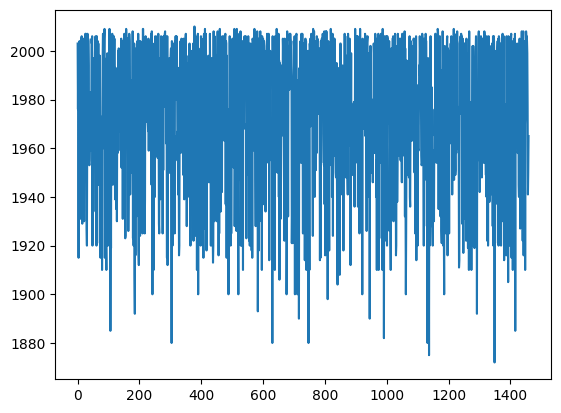

In [32]:
data['YearBuilt'].plot()

The stats.ttest_ind() function from the scipy.stats module in Python performs an independent two-sample t-test for the null hypothesis that two independent samples have identical average (expected) values. Here's a breakdown of its parameters:

a, b: Arrays or lists of sample data.
axis: Specifies the axis along which to compute the test. Typically, this is 0 for comparing along columns or 1 for comparing along rows.
equal_var: Boolean indicating whether to assume equal variance (True) or not (False). If True, Welch's t-test is used when variances are not equal. If False, assumes variances are not equal.

In [33]:
a= data[data['YearBuilt']<=1990]['SalePrice']
b=data[data['YearBuilt']>1990]['SalePrice']
stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=np.float64(-25.56467512748203), pvalue=np.float64(2.081761246883554e-119), df=np.float64(1458.0))

In [34]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = stats.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285



 -------------------- describe ---------------------

LandContour            Bnk            HLS            Low            Lvl
count            63.000000      50.000000      36.000000    1311.000000
mean         143104.079365  231533.940000  203661.111111  180183.746758
std           49361.244074  101790.139741   83935.353620   78463.567918
min           52500.000000   82500.000000   39300.000000   34900.000000
25%          113000.000000  151750.000000  143000.000000  130000.000000
50%          139400.000000  222250.000000  190000.000000  162900.000000
75%          171250.000000  281347.250000  263750.000000  212000.000000
max          315000.000000  538000.000000  385000.000000  755000.000000


 -------------------- One way anova ---------------------



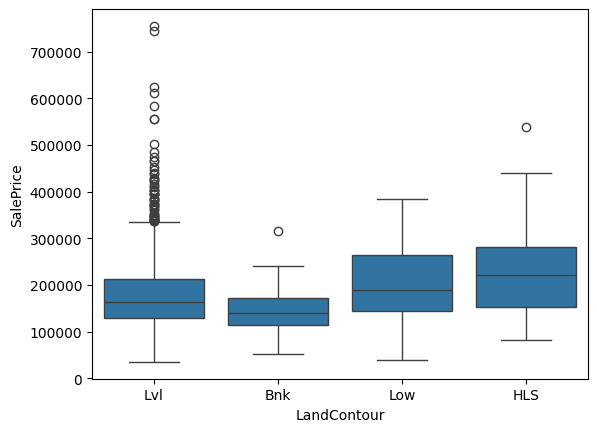

In [35]:
print('\n -------------------- describe ---------------------\n')
print(data.groupby('LandContour')['SalePrice'].describe().T)
    
    
#box_plot(category_cols,independent_col,dependent_col)
sns.boxplot(x='LandContour', y='SalePrice', data = data)
print('\n\n -------------------- One way anova ---------------------\n')

Chi-Square Test (stats.chi2_contingency):

stats.chi2_contingency(freqtab) computes the chi-square statistic, p-value, degrees of freedom, and expected frequencies based on the contingency table freqtab.


In [36]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'],data['SalePrice'][data['LandContour'] == 'Bnk'],data['SalePrice'][data['LandContour'] == 'Low'],data['SalePrice'][data['LandContour'] == 'HLS'])


F_onewayResult(statistic=np.float64(12.850188333283924), pvalue=np.float64(2.7422167521379096e-08))

In [37]:
stats.f_oneway(data['SalePrice'][data['LandContour'] == 'Lvl'].sample(35),data['SalePrice'][data['LandContour'] == 'Bnk'].sample(35),data['SalePrice'][data['LandContour'] == 'Low'].sample(35),data['SalePrice'][data['LandContour'] == 'HLS'].sample(35))


F_onewayResult(statistic=np.float64(6.312162155790539), pvalue=np.float64(0.0004852053294563307))